# Lecture 08 Accompanying Material
Reference: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-and-visualizing-it-with-example-and-python-code-7af2681a10a7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
np.random.seed(54)

def dist_function(x):
    f_x = np.sin(x)
    return f_x

def gen_data(x):
    f_x = dist_function(x)
    b = 0.4
    y = f_x + np.random.uniform(-b, b, len(x))
    sigma = 1/12*(2*b)**2
    return y, f_x, sigma


def get_rand_data(len_ratio, x, y, f_x):
    m = len(x)
    m_new = int(np.round(len_ratio*m))
    ind = random.sample(range(m), m_new)
    ind = np.sort(ind)

    x1 = x[ind]
    y1 = y[ind]
    f_x1 = f_x[ind]

    return x1, y1, f_x1


x_orig = np.arange(0, 4 * np.pi + 0.2, .2)

y_orig, f_x_orig, sigma = gen_data(x_orig)


<ipython-input-159-1227a0956ac5>:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(x_orig, f_x_orig, label="true data")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


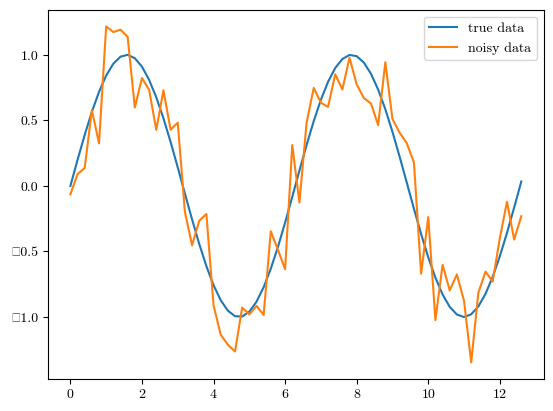

In [ ]:
plt.plot(x_orig, f_x_orig, label="true data")
plt.plot(x_orig,y_orig, label="noisy data")
plt.legend()
plt.show()

## High bias



<ipython-input-102-c589df6d2468>:12: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(h.history['loss'], label="train loss")


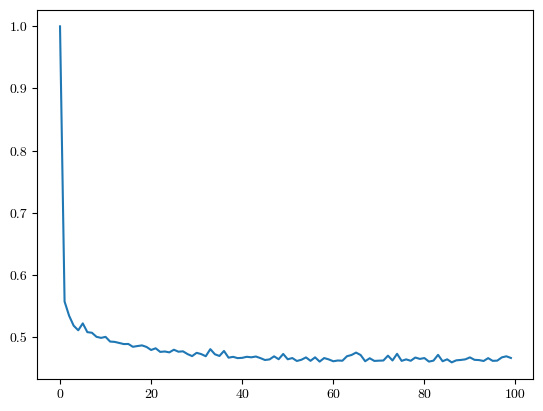

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Dense(8, input_shape=(1,), activation="linear"))
model.add(tf.keras.layers.Dense(1, activation='linear'))
# Take a look at the model summary
model.compile(optimizer="Adam", loss="mse")
h = model.fit(x_orig.reshape(-1,1), y_orig.reshape(-1,1), epochs=100, verbose=0, batch_size=4)

plt.plot(h.history['loss'], label="train loss")
plt.show()

<ipython-input-103-235a1224d4e1>:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(x_orig, f_x_orig, label="true data")


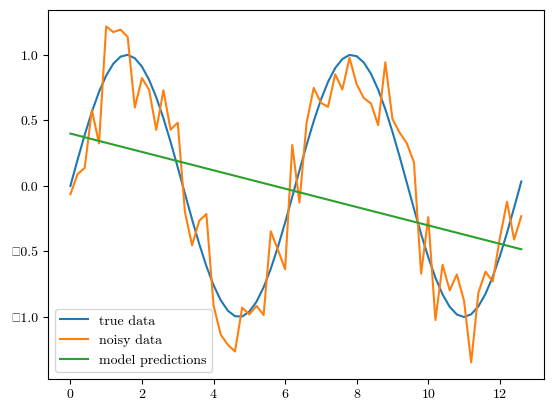

In [ ]:
plt.plot(x_orig, f_x_orig, label="true data")
plt.plot(x_orig,y_orig, label="noisy data")
plt.plot(x_orig,model(x_orig.reshape(-1,1)).numpy().reshape(-1), label="model predictions")
plt.legend()
plt.show()

## Appropiate bias-variance trade-off




<ipython-input-116-d2f19007c1bc>:14: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(h.history['loss'], label="train loss")


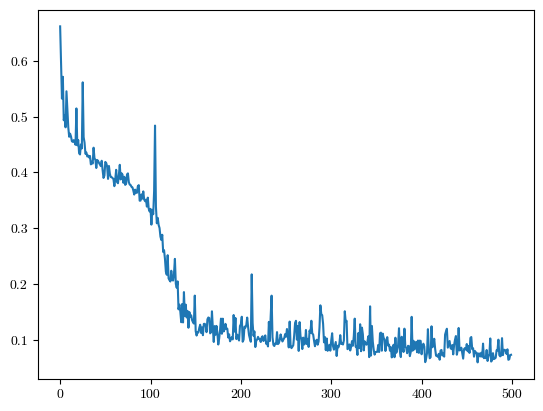

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Dense(32, input_shape=(1,), activation="linear"))
model.add(tf.keras.layers.Dense(32, activation="leaky_relu"))
model.add(tf.keras.layers.Dense(64, activation="leaky_relu"))
model.add(tf.keras.layers.Dense(1, activation='linear'))
# Take a look at the model summary
model.compile(optimizer="Adam", loss="mse")
h = model.fit(x_orig.reshape(-1,1), y_orig.reshape(-1,1), epochs=250, verbose=0, batch_size=2)

plt.plot(h.history['loss'], label="train loss")
plt.show()

<ipython-input-117-235a1224d4e1>:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(x_orig, f_x_orig, label="true data")


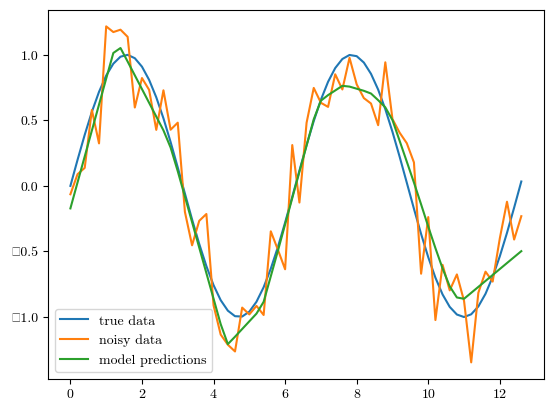

In [ ]:
plt.plot(x_orig, f_x_orig, label="true data")
plt.plot(x_orig,y_orig, label="noisy data")
plt.plot(x_orig,model(x_orig.reshape(-1,1)).numpy().reshape(-1), label="model predictions")
plt.legend()
plt.show()

## High variance

<ipython-input-127-10fcbb2c5654>:16: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(h.history['loss'], label="train loss")


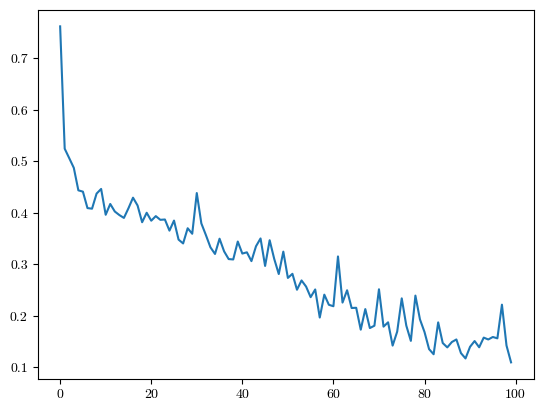

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Dense(64, input_shape=(1,), activation="linear"))
model.add(tf.keras.layers.Dense(128, activation="leaky_relu"))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(512, activation="leaky_relu"))
model.add(tf.keras.layers.Dense(64, activation="leaky_relu"))
model.add(tf.keras.layers.Dense(1, activation='linear'))
# Take a look at the model summary
model.compile(optimizer="Adam", loss="mse")
h = model.fit(x_orig.reshape(-1,1), y_orig.reshape(-1,1), epochs=100, verbose=0, batch_size=1)

plt.plot(h.history['loss'], label="train loss")
plt.show()

<ipython-input-128-235a1224d4e1>:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(x_orig, f_x_orig, label="true data")


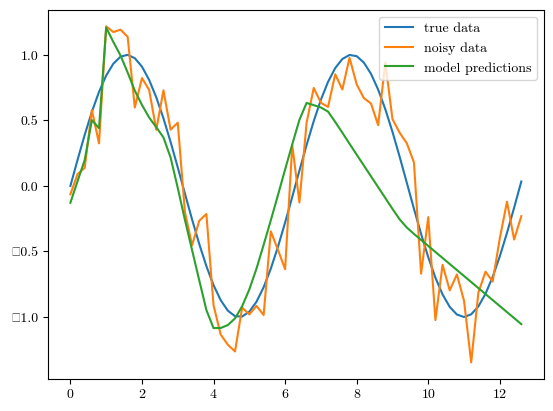

In [ ]:
plt.plot(x_orig, f_x_orig, label="true data")
plt.plot(x_orig,y_orig, label="noisy data")
plt.plot(x_orig,model(x_orig.reshape(-1,1)).numpy().reshape(-1), label="model predictions")
plt.legend()
plt.show()

Notice how, before the model breaks down in performance, it tries to very closely follow the random fluctuations in the input data.

<ipython-input-156-87a22455b18e>:13: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(h.history['loss'], label="train loss")


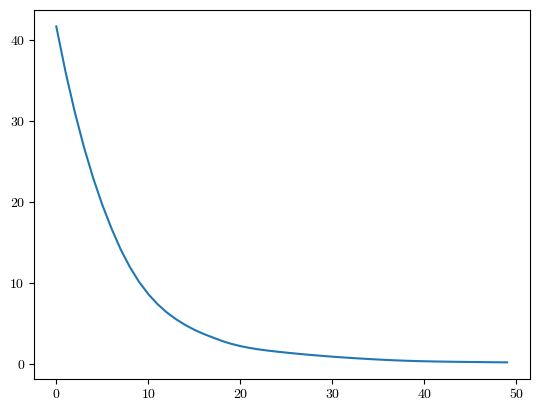

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Dense(16, input_shape=(64,), activation="linear"))
model.add(tf.keras.layers.Dense(32, activation="leaky_relu"))
model.add(tf.keras.layers.Dense(64, activation='linear'))
# Take a look at the model summary
model.compile(optimizer="Adam", loss="mse")
h = model.fit(x_orig.reshape(1,-1), y_orig.reshape(1,-1), epochs=50, verbose=0, batch_size=1)

plt.plot(h.history['loss'], label="train loss")
plt.show()

<ipython-input-157-84e228bf06ed>:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(x_orig, f_x_orig, label="true data")


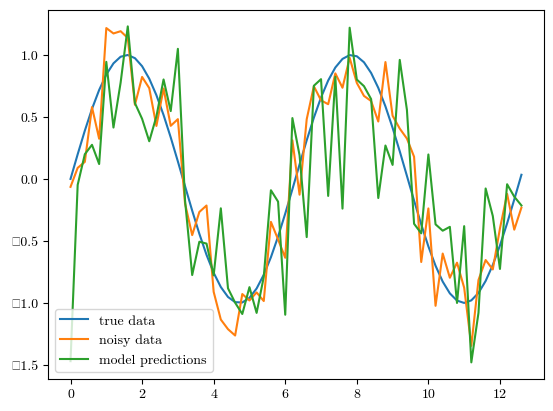

In [ ]:
plt.plot(x_orig, f_x_orig, label="true data")
plt.plot(x_orig,y_orig, label="noisy data")
plt.plot(x_orig,model(x_orig.reshape(1,-1)).numpy().reshape(-1), label="model predictions")
plt.legend()
plt.show()